<h1 style="text-align:center">AppleWiseAI</h1>

<h3 style="text-align:center">Predicting prices of Apple stocks using past data.</h3>

1. Date: Date of the trading day.
2. Open: Price at which the stock starts trading when market opens.
3. High: Highest price the stock is traded during the day.
4. Low: Lowest price the stock is traded during the day.
5. Close: Price at which the stock ends when the market closes (Target variable)
6. Adj Close: This is the adjusted close price, caused due to other market factors.
7. Volume: Number of shares traded during the day.

In [1]:
import warnings
warnings.filterwarnings("ignore")
import os
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("Apple Dataset.csv")
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


## Data Preprocessing

In [3]:
# calculating the rows and columns in the dataset
rows = df.shape[0]
columns = df.shape[1]

print(f"Number of rows in the dataset: {rows}")
print(f"Number of columns in the dataset: {columns}")

Number of rows in the dataset: 10954
Number of columns in the dataset: 7


In [4]:
# checking the data types of the columns in the dataset
df.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [5]:
# changing the date column to datetime
df["Date"] = pd.to_datetime(df["Date"])
df.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

In [6]:
# checking the number of null values in the dataset
no_null = df.isnull().sum()

print("Number of missing values in the dataset:")
print(no_null)

Number of missing values in the dataset:
Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


There are no null values in the dataset. So no techniques have to be followed to fill any possible null values.

## Data Visualization

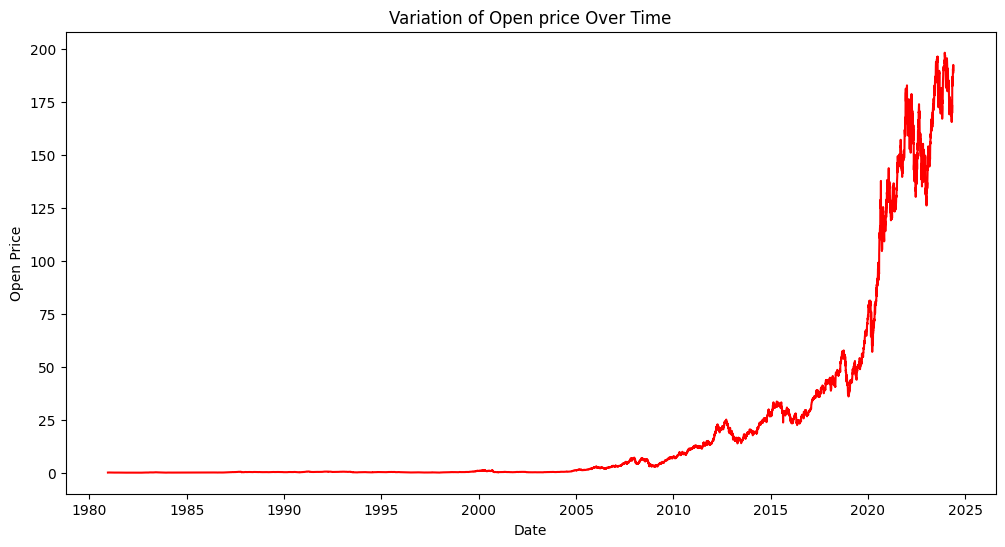

In [7]:
# drawing a plot to show variation of open price over time
plt.figure(figsize=(12, 6))
plt.plot(df["Date"], df["Open"], color="red")
plt.title("Variation of Open price Over Time")
plt.xlabel("Date")
plt.ylabel("Open Price")
plt.show()

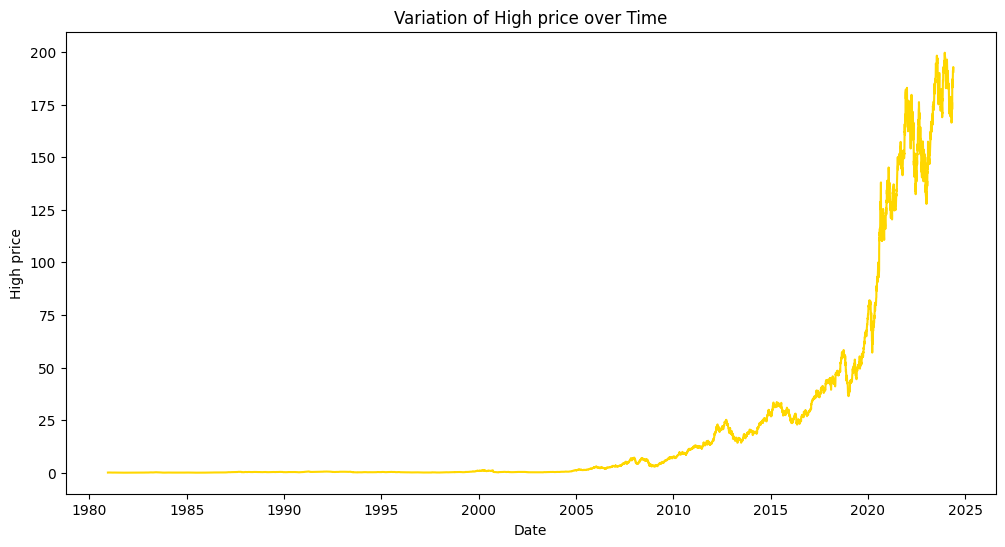

In [8]:
# drawing a plot to show variation of high price over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["High"], color="gold")
plt.title("Variation of High price over Time")
plt.xlabel("Date")
plt.ylabel("High price")
plt.show()

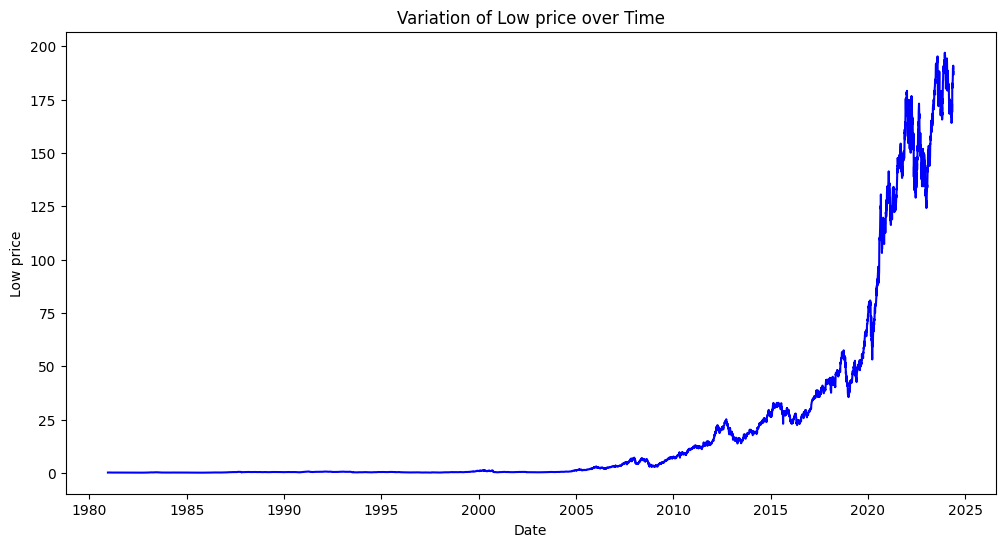

In [9]:
# drawing a plot to show variation of low price over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Low"], color="blue")
plt.title("Variation of Low price over Time")
plt.xlabel("Date")
plt.ylabel("Low price")
plt.show()

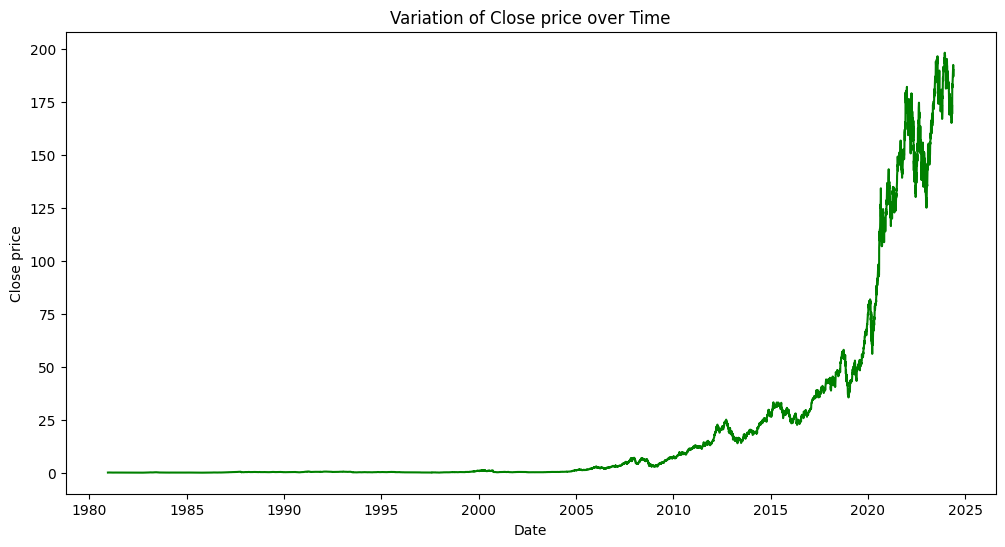

In [10]:
# drawing a plot to show variation of close price over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Close"], color="green")
plt.title("Variation of Close price over Time")
plt.xlabel("Date")
plt.ylabel("Close price")
plt.show()

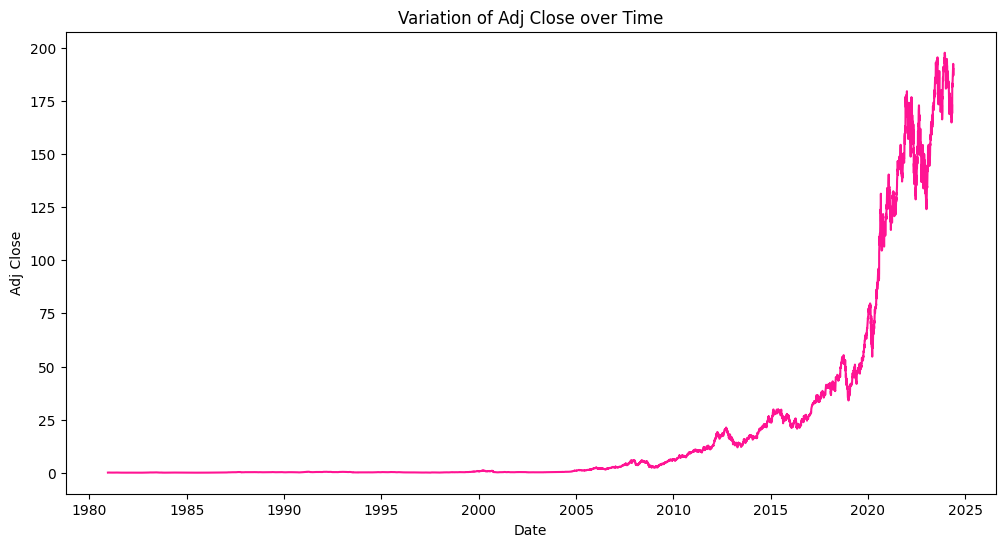

In [11]:
# drawing a plot to show variation of adj close over time
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Adj Close"], color="deeppink")
plt.title("Variation of Adj Close over Time")  
plt.xlabel("Date")
plt.ylabel("Adj Close")
plt.show()

All these graphs follow the same pattern roughly. This shows that the data is genuine and can be used to generate predictions.

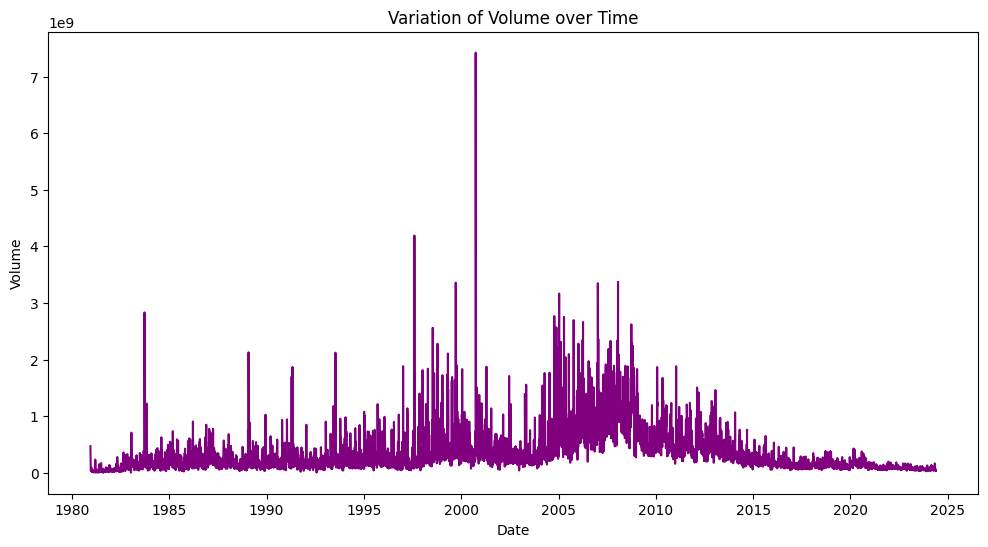

In [12]:
# drawing a plot to show variation of volume over time- shows which periods more stocks have been sold
plt.figure(figsize=(12,6))
plt.plot(df["Date"], df["Volume"], color="purple")
plt.title("Variation of Volume over Time")
plt.xlabel("Date")
plt.ylabel("Volume")
plt.show()

In [13]:
# calculating the number of shares sold for each year
df["Year"] = df["Date"].dt.year
shares_sold = df.groupby("Year")["Volume"].sum()
print(shares_sold)

Year
1980      1344851200
1981      8196944000
1982     21365008000
1983     44513011200
1984     41979033600
1985     45492272000
1986     53323222400
1987     59771308800
1988     41292977600
1989     50905825600
1990     44401940800
1991     57347651200
1992     41137913600
1993     56452928000
1994     57155896000
1995     74266539200
1996     53194220800
1997     71963360000
1998    115194195200
1999    137102705600
2000    120301596800
2001     94657796800
2002     77013927200
2003     71230252800
2004    121801668800
2005    182400982400
2006    215698966000
2007    246995985600
2008    285981206000
2009    143253686800
2010    151024927200
2011    124059339600
2012    131964204400
2013    102421569600
2014     63657952400
2015     52264199600
2016     38729911200
2017     27243106000
2018     34156144800
2019     28254942800
2020     39863855600
2021     22812206100
2022     22065504500
2023     14804257200
2024      6133429500
Name: Volume, dtype: int64


In [14]:
share_count_df = pd.DataFrame(shares_sold)
share_count_df.reset_index(inplace=True)
share_count_df

,Year,Volume
0,1980,1344851200
1,1981,8196944000
2,1982,21365008000
3,1983,44513011200
4,1984,41979033600
5,1985,45492272000
6,1986,53323222400
7,1987,59771308800
8,1988,41292977600
9,1989,50905825600


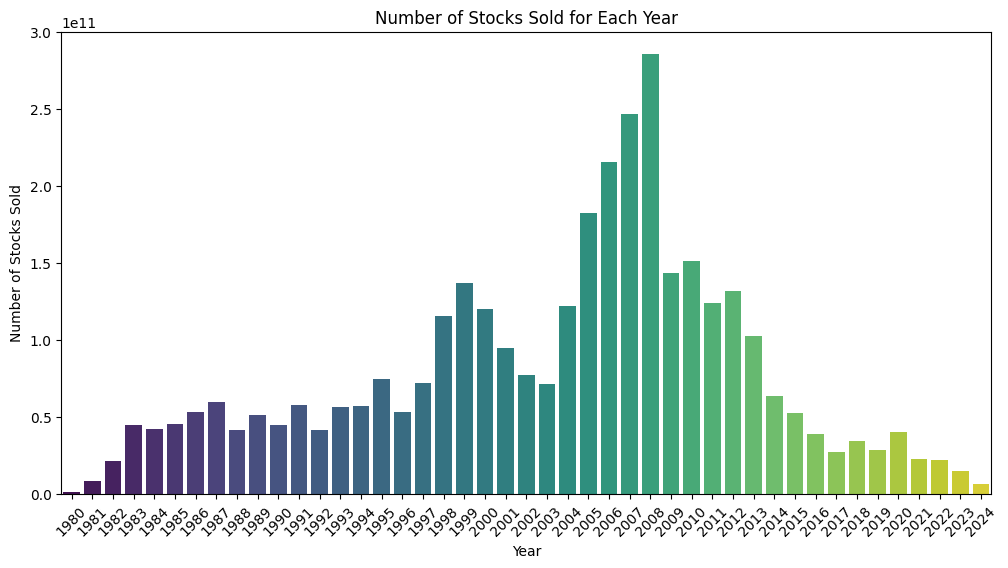

In [15]:
# plotting a graph to see the variation of number of stocks for each year
plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Volume", data=share_count_df, palette="viridis")
plt.title("Number of Stocks Sold for Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Stocks Sold")
plt.xticks(rotation=45)
plt.show()

The graph shows that the most shares have been sold in the year 2008.

In [16]:
# calculating the average closing price for each year
average_close_price = df.groupby("Year")["Close"].mean()
print(average_close_price)

Year
1980      0.135903
1981      0.108548
1982      0.085459
1983      0.167274
1984      0.119651
1985      0.090233
1986      0.144913
1987      0.347751
1988      0.370884
1989      0.371953
1990      0.335373
1991      0.468701
1992      0.489309
1993      0.366310
1994      0.304291
1995      0.361966
1996      0.222495
1997      0.160418
1998      0.272900
1999      0.515805
2000      0.816283
2001      0.361061
2002      0.341776
2003      0.331156
2004      0.634410
2005      1.667001
2006      2.528951
2007      4.581211
2008      5.070679
2009      5.243362
2010      9.280088
2011     13.000154
2012     20.573204
2013     16.879817
2014     23.066164
2015     30.010000
2016     26.151002
2017     37.637769
2018     47.263357
2019     52.063988
2020     95.347075
2021    140.989365
2022    154.835060
2023    172.549000
2024    179.776435
Name: Close, dtype: float64


In [17]:
# converting the series to a dataframe
average_close_price_df = pd.DataFrame(average_close_price)
average_close_price_df.reset_index(inplace=True)
average_close_price_df

,Year,Close
0,1980,0.135903
1,1981,0.108548
2,1982,0.085459
3,1983,0.167274
4,1984,0.119651
5,1985,0.090233
6,1986,0.144913
7,1987,0.347751
8,1988,0.370884
9,1989,0.371953


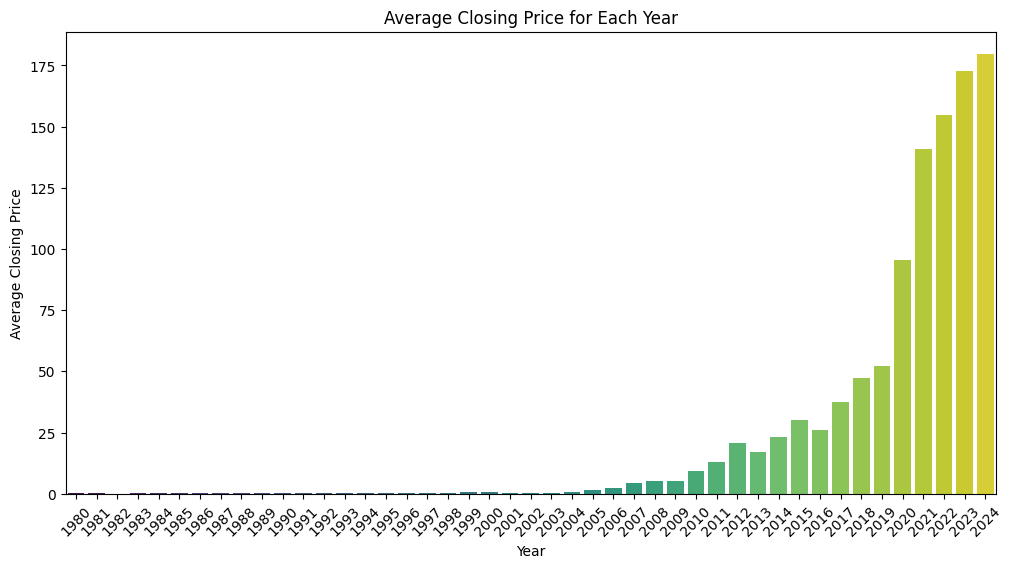

In [18]:
# plotting the graph to show the average closing price for each year
plt.figure(figsize=(12,6))
sns.barplot(x="Year", y="Close", data=average_close_price_df, palette="viridis")
plt.title("Average Closing Price for Each Year")
plt.xlabel("Year")
plt.ylabel("Average Closing Price")
plt.xticks(rotation=45)
plt.show()

This shows that the avergae closing price of the stocks have increased over the years.

In [19]:
# dropping the year column
df.drop("Year", axis=1, inplace=True)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


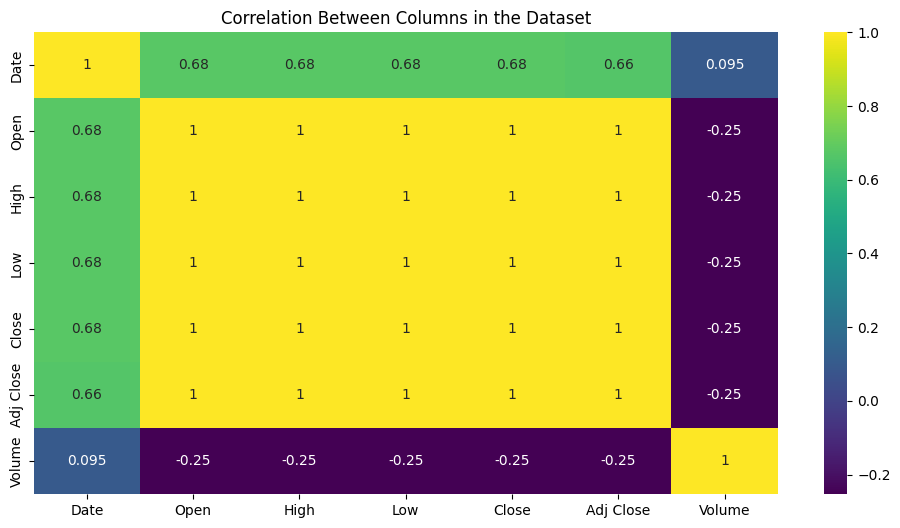

In [20]:
# calculating the correlation between the columns in the dataset
correlation = df.corr()

# plotting a heatmap
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True, cmap="viridis")
plt.title("Correlation Between Columns in the Dataset")
plt.show()

## Generating predictions

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_percentage_error

### Machine Learning models

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [23]:
df['Date'] = pd.to_datetime(df['Date'])
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Feature set
features = ['Open', 'High', 'Low', 'Adj Close', 'Volume', 'Day', 'Month', 'Year', 'DayOfWeek']
x = df[features]
y = df['Close']

In [24]:
x

,Open,High,Low,Adj Close,Volume,Day,Month,Year,DayOfWeek
0,0.128348,0.128906,0.128348,0.099058,469033600,12,12,1980,4
1,0.122210,0.122210,0.121652,0.093890,175884800,15,12,1980,0
2,0.113281,0.113281,0.112723,0.086999,105728000,16,12,1980,1
3,0.115513,0.116071,0.115513,0.089152,86441600,17,12,1980,2
4,0.118862,0.119420,0.118862,0.091737,73449600,18,12,1980,3
...,...,...,...,...,...,...,...,...,...
10949,189.330002,191.919998,189.009995,191.039993,44361300,20,5,2024,0
10950,191.089996,192.729996,190.919998,192.350006,42309400,21,5,2024,1
10951,192.270004,192.820007,190.270004,190.899994,34648500,22,5,2024,2
10952,190.979996,191.000000,186.630005,186.880005,51005900,23,5,2024,3


In [25]:
y

0          0.128348
1          0.121652
2          0.112723
3          0.115513
4          0.118862
            ...    
10949    191.039993
10950    192.350006
10951    190.899994
10952    186.880005
10953    189.979996
Name: Close, Length: 10954, dtype: float64

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Linear Regression

In [27]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [28]:
train_accuracy = lr.score(x_train, y_train)
test_accuracy = lr.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9999599252125712
Testing Accuracy: 0.9999625200141559


In [29]:
y_preds_lr = lr.predict(x_test)

In [30]:
# calculating the R2 score
r2_lr = r2_score(y_test, y_preds_lr)
print(f"r2 Score: {r2_lr}")

# calculating the mean absolute percentage error
mape_lr = mean_absolute_percentage_error(y_test, y_preds_lr)
print(f"Mean Absolute Percentage Error: {mape_lr}")

r2 Score: 0.9999625200141559
Mean Absolute Percentage Error: 0.2456175722183841


#### Decision Tree Regressor

In [31]:
dtc = DecisionTreeRegressor()
dtc.fit(x_train, y_train)

DecisionTreeRegressor()

In [32]:
train_accuracy = dtc.score(x_train, y_train)
test_accuracy = dtc.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 1.0
Testing Accuracy: 0.9999719600188265


In [33]:
y_preds_dtc = dtc.predict(x_test)

In [34]:
r2_dtc = r2_score(y_test, y_preds_dtc)
print(f"r2 Score: {r2_dtc}")

mape_dtc = mean_absolute_percentage_error(y_test, y_preds_dtc)
print(f"Mean Absolute Percentage Error: {mape_dtc}")

r2 Score: 0.9999719600188265
Mean Absolute Percentage Error: 0.006306142124051295


#### Random Forest Regressor

In [35]:
rf = RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [36]:
train_accuracy = rf.score(x_train, y_train)
test_accuracy = rf.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9999979964527872
Testing Accuracy: 0.9999828590584047


In [37]:
y_preds_rf = rf.predict(x_test)

In [38]:
r2_rf = r2_score(y_test, y_preds_rf)
print(f"r2 Score: {r2_rf}")

mape_rf = mean_absolute_percentage_error(y_test, y_preds_rf)
print(f"Mean Absolute Percentage Error: {mape_rf}")

r2 Score: 0.9999828590584047
Mean Absolute Percentage Error: 0.004676697159321175


#### Support Vector Regressor

In [39]:
svr = SVR()
svr.fit(x_train, y_train)

SVR()

In [40]:
train_accuracy = svr.score(x_train, y_train)
test_accuracy = svr.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: -0.22358580116092241
Testing Accuracy: -0.21617198667042103


In [41]:
y_preds_svr = svr.predict(x_test)

In [42]:
r2_svr = r2_score(y_test, y_preds_svr)
print(f"r2 Score: {r2_svr}")

mape_svr = mean_absolute_percentage_error(y_test, y_preds_svr)
print(f"Mean Absolute Percentage Error: {mape_svr}")

r2 Score: -0.21617198667042103
Mean Absolute Percentage Error: 1.5215959130752532


#### KNeighbours Regressor

In [43]:
knr = KNeighborsRegressor()
knr.fit(x_train, y_train)

KNeighborsRegressor()

In [44]:
train_accuracy = knr.score(x_train, y_train)
test_accuracy = knr.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.45049223410622485
Testing Accuracy: 0.1805934404178251


In [45]:
y_preds_knr = knr.predict(x_test)

In [46]:
r2_knr = r2_score(y_test, y_preds_knr)
print(f"r2 Score: {r2_knr}")

mape_knr = mean_absolute_percentage_error(y_test, y_preds_knr)
print(f"Mean Absolute Percentage Error: {mape_knr}")

r2 Score: 0.1805934404178251
Mean Absolute Percentage Error: 66.98899172553863


#### XGBoost Regressor

In [47]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
train_accuracy = xgb.score(x_train, y_train)
test_accuracy = xgb.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9999917568183425
Testing Accuracy: 0.9998833533122372


In [49]:
y_preds_xgb = xgb.predict(x_test)

In [50]:
r2_xgb = r2_score(y_test, y_preds_xgb)
print(f"r2 Score: {r2_xgb}")

mape_xgb = mean_absolute_percentage_error(y_test, y_preds_xgb)
print(f"Mean Absolute Percentage Error: {mape_xgb}")

r2 Score: 0.9998833533122372
Mean Absolute Percentage Error: 0.03407290888107443


#### Gradient Boosting Regressor

In [51]:
gbr = GradientBoostingRegressor()
gbr.fit(x_train, y_train)

GradientBoostingRegressor()

In [52]:
train_accuracy = gbr.score(x_train, y_train)
test_accuracy = gbr.score(x_test, y_test)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

Training Accuracy: 0.9999755877447902
Testing Accuracy: 0.999957394954163


In [53]:
y_preds_gbr = gbr.predict(x_test)

In [54]:
r2_gbr = r2_score(y_test, y_preds_gbr)
print(f"r2 Score: {r2_gbr}")

mape_gbr = mean_absolute_percentage_error(y_test, y_preds_gbr)
print(f"Mean Absolute Percentage Error: {mape_gbr}")

r2 Score: 0.999957394954163
Mean Absolute Percentage Error: 0.03814741553952117


#### Evaluation of Machine Learning models.

In [55]:
# comparing the models
models = ["Linear Regression", "Decision Tree", "Random Forest", "Support Vector Regressor", "K-Nearest Neighbors", "XGBoost", "Gradient Boosting"]
r2_scores = [r2_lr, r2_dtc, r2_rf, r2_svr, r2_knr, r2_xgb, r2_gbr]
mape_scores = [mape_lr, mape_dtc, mape_rf, mape_svr, mape_knr, mape_xgb, mape_gbr]

comparison_df = pd.DataFrame({"Model": models, "R2 Score": r2_scores, "Mean Absolute Percentage Error": mape_scores})
comparison_df

,Model,R2 Score,Mean Absolute Percentage Error
0,Linear Regression,0.999963,0.245618
1,Decision Tree,0.999972,0.006306
2,Random Forest,0.999983,0.004677
3,Support Vector Regressor,-0.216172,1.521596
4,K-Nearest Neighbors,0.180593,66.988992
5,XGBoost,0.999883,0.034073
6,Gradient Boosting,0.999957,0.038147


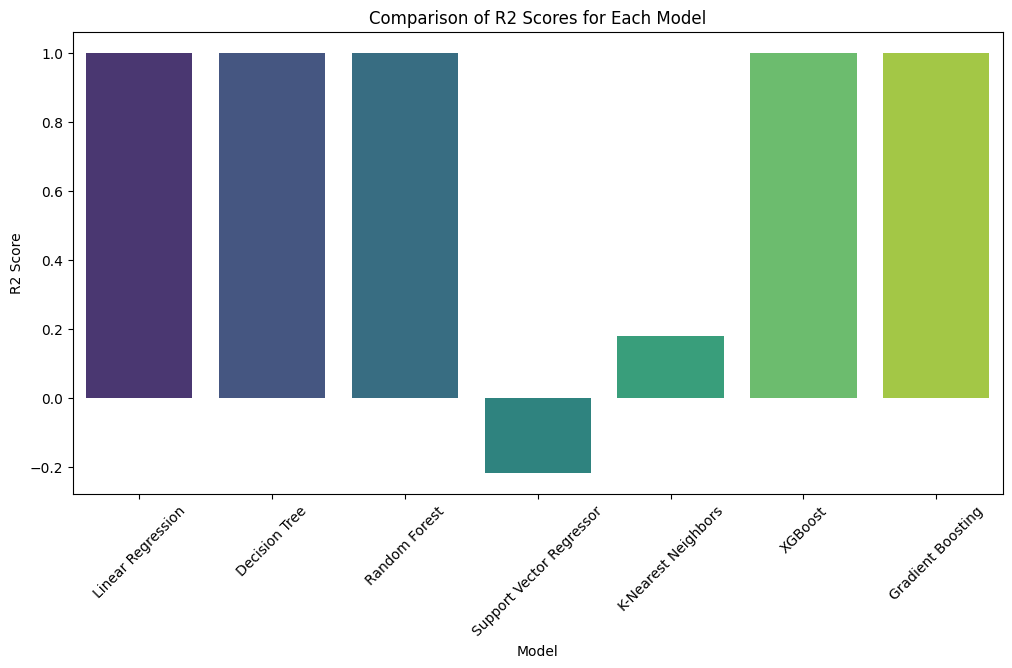

In [56]:
# plotting the comparison of r2 scores for each model
plt.figure(figsize=(12,6))
sns.barplot(x="Model", y="R2 Score", data=comparison_df, palette="viridis")
plt.title("Comparison of R2 Scores for Each Model")
plt.xlabel("Model")
plt.ylabel("R2 Score")
plt.xticks(rotation=45)
plt.show()

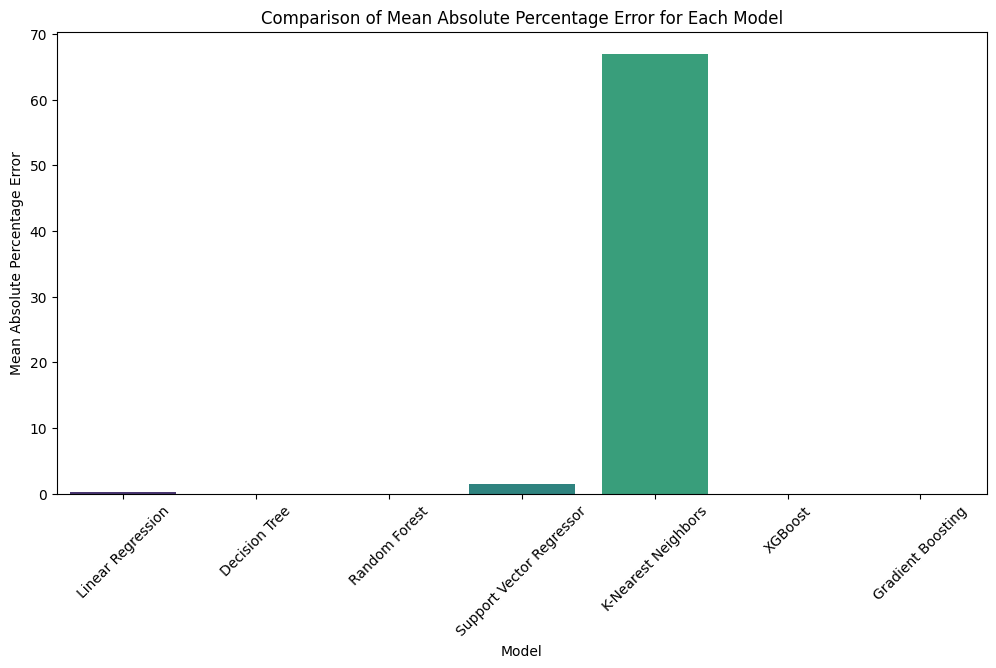

In [57]:
# plotting the comparison of mean absolute percentage error for each model
plt.figure(figsize=(12,6))
sns.barplot(x="Model", y="Mean Absolute Percentage Error", data=comparison_df, palette="viridis")
plt.title("Comparison of Mean Absolute Percentage Error for Each Model")
plt.xlabel("Model")
plt.ylabel("Mean Absolute Percentage Error")
plt.xticks(rotation=45)
plt.show()

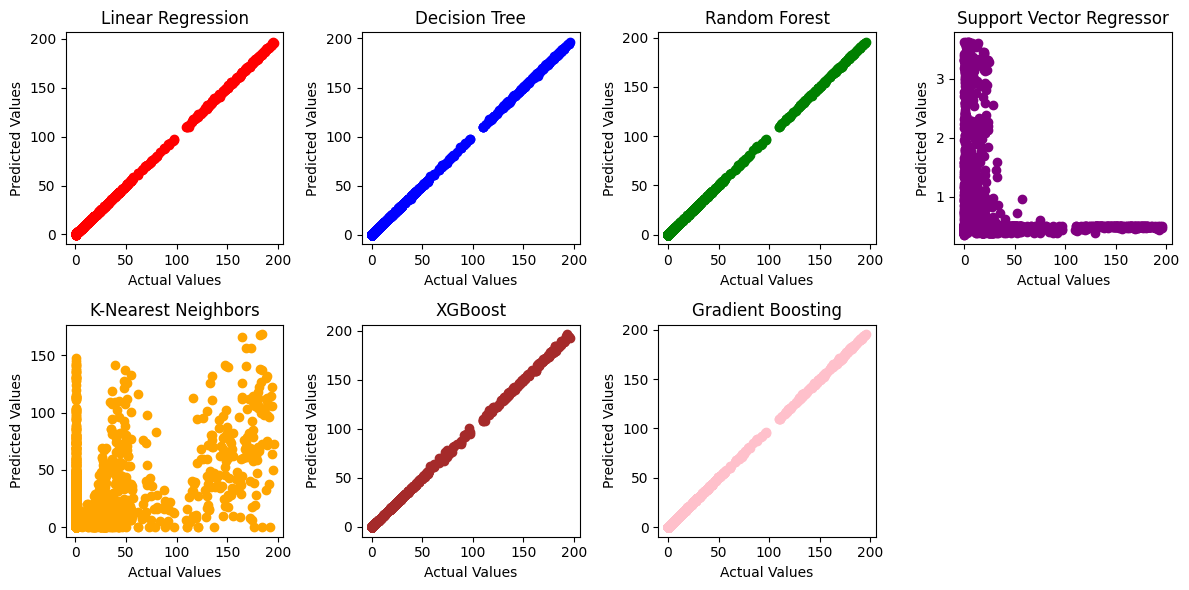

In [58]:
# plotting predicted vs actual values for each model using subplots
plt.figure(figsize=(12,6))
plt.subplot(2, 4, 1)
plt.scatter(y_test, y_preds_lr, color="red")
plt.title("Linear Regression")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 4, 2)
plt.scatter(y_test, y_preds_dtc, color="blue")
plt.title("Decision Tree")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 4, 3)
plt.scatter(y_test, y_preds_rf, color="green")
plt.title("Random Forest")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 4, 4)
plt.scatter(y_test, y_preds_svr, color="purple")
plt.title("Support Vector Regressor")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 4, 5)
plt.scatter(y_test, y_preds_knr, color="orange")
plt.title("K-Nearest Neighbors")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 4, 6)
plt.scatter(y_test, y_preds_xgb, color="brown")
plt.title("XGBoost")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.subplot(2, 4, 7)
plt.scatter(y_test, y_preds_gbr, color="pink")
plt.title("Gradient Boosting")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")

plt.tight_layout()
plt.show()

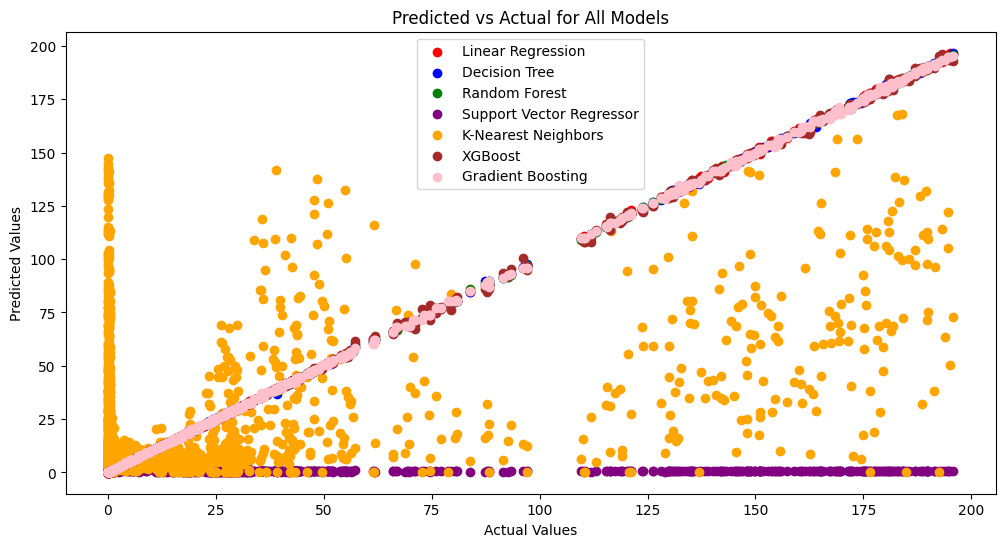

In [59]:
# plotting predicted vs actual for all the models
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_preds_lr, color="red", label="Linear Regression")
plt.scatter(y_test, y_preds_dtc, color="blue", label="Decision Tree")
plt.scatter(y_test, y_preds_rf, color="green", label="Random Forest")
plt.scatter(y_test, y_preds_svr, color="purple", label="Support Vector Regressor")
plt.scatter(y_test, y_preds_knr, color="orange", label="K-Nearest Neighbors")
plt.scatter(y_test, y_preds_xgb, color="brown", label="XGBoost")
plt.scatter(y_test, y_preds_gbr, color="pink", label="Gradient Boosting")
plt.title("Predicted vs Actual for All Models")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.legend()
plt.show()

### Time Series Models

In [60]:
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [61]:
# dropping the columns so that only Date and Close columns are left.
df.drop(["Open", "High", "Low", "Adj Close", "Volume", "Day", "Month", "Year", "DayOfWeek"], axis=1, inplace=True)
df

,Date,Close
0,1980-12-12,0.128348
1,1980-12-15,0.121652
2,1980-12-16,0.112723
3,1980-12-17,0.115513
4,1980-12-18,0.118862
...,...,...
10949,2024-05-20,191.039993
10950,2024-05-21,192.350006
10951,2024-05-22,190.899994
10952,2024-05-23,186.880005


In [62]:
# splitting the dataset
train = df[:int(0.8*(len(df)))]
test = df[int(0.8*(len(df))):]

In [63]:
# checking the size of training and testing data
train.shape, test.shape

((8763, 2), (2191, 2))

In [64]:
# using auto arima to get the best parameters
auto_arima_model = auto_arima(train["Close"], seasonal=False, trace=True, suppress_warnings=True, stepwise=True)
p,d,q = auto_arima_model.order
print(p,d,q)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=11.43 sec
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=-4081.216, Time=0.52 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=-6365.561, Time=2.40 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=4.99 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=-4083.215, Time=0.23 sec
 ARIMA(2,2,0)(0,0,0)[0] intercept   : AIC=-7371.402, Time=1.03 sec
 ARIMA(3,2,0)(0,0,0)[0] intercept   : AIC=-8028.643, Time=1.81 sec
 ARIMA(4,2,0)(0,0,0)[0] intercept   : AIC=-8351.954, Time=1.92 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=-8670.914, Time=2.40 sec
 ARIMA(5,2,1)(0,0,0)[0] intercept   : AIC=-9968.207, Time=9.03 sec
 ARIMA(4,2,1)(0,0,0)[0] intercept   : AIC=-9999.202, Time=8.47 sec
 ARIMA(3,2,1)(0,0,0)[0] intercept   : AIC=inf, Time=8.15 sec
 ARIMA(4,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=10.49 sec
 ARIMA(3,2,2)(0,0,0)[0] intercept   : AIC=inf, Time=9.24 sec
 ARIMA(5,2,2)(0,0,0)[0] intercept   : AIC=-9925

#### AutoRegressive Integrated Moving Average (ARIMA)

In [65]:
arima_model = ARIMA(train["Close"], order=(p,d,q))
arima_model = arima_model.fit()
print(arima_model.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 8763
Model:                 ARIMA(4, 2, 1)   Log Likelihood                5031.160
Date:                Wed, 05 Jun 2024   AIC                         -10050.319
Time:                        10:59:54   BIC                         -10007.851
Sample:                             0   HQIC                        -10035.849
                               - 8763                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0096      0.003      2.805      0.005       0.003       0.016
ar.L2         -0.0296      0.004     -7.316      0.000      -0.037      -0.022
ar.L3         -0.0232      0.004     -6.199      0.0

In [66]:
y_preds_arima = arima_model.forecast(steps=len(test))
r2_arima = r2_score(test["Close"], y_preds_arima)
print(f"r2 Score: {r2_arima}")

mape_arima = mean_absolute_percentage_error(test["Close"], y_preds_arima)
print(f"Mean Absolute Percentage Error: {mape_arima}")

r2 Score: -0.620342002831884
Mean Absolute Percentage Error: 0.4262146454876772


In [67]:
auto_arima_model = auto_arima(df["Close"], seasonal=True, trace=True, suppress_warnings=True, stepwise=True)
p,d,q, = auto_arima_model.order
print(p,d,q)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=inf, Time=2.24 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=35931.967, Time=0.08 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=32767.003, Time=0.11 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=inf, Time=0.54 sec
 ARIMA(2,2,0)(0,0,0)[0]             : AIC=31427.553, Time=0.18 sec
 ARIMA(3,2,0)(0,0,0)[0]             : AIC=30657.377, Time=0.27 sec
 ARIMA(4,2,0)(0,0,0)[0]             : AIC=30068.418, Time=0.36 sec
 ARIMA(5,2,0)(0,0,0)[0]             : AIC=29794.785, Time=0.55 sec
 ARIMA(5,2,1)(0,0,0)[0]             : AIC=inf, Time=2.41 sec
 ARIMA(4,2,1)(0,0,0)[0]             : AIC=inf, Time=1.82 sec
 ARIMA(5,2,0)(0,0,0)[0] intercept   : AIC=29796.785, Time=1.22 sec

Best model:  ARIMA(5,2,0)(0,0,0)[0]          
Total fit time: 9.796 seconds
5 2 0


#### Seasonal AutoRegressive Integrated Moving Average

In [68]:
sarima_model = SARIMAX(train["Close"], order=(p,d,q), seasonal_order=(p,d,q,12))
sarima_model = sarima_model.fit()
print(sarima_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 8763
Model:             SARIMAX(5, 2, 0)x(5, 2, 0, 12)   Log Likelihood                2163.843
Date:                            Wed, 05 Jun 2024   AIC                          -4305.685
Time:                                    11:01:31   BIC                          -4227.857
Sample:                                         0   HQIC                         -4279.163
                                           - 8763                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8042      0.004   -211.083      0.000      -0.812      -0.797
ar.L2         -0.6740      0.004   

In [69]:
y_preds_sarima = sarima_model.forecast(steps=len(test))
r2_sarima = r2_score(test["Close"], y_preds_sarima)
print(f"r2 Score: {r2_sarima}")

mape_sarima = mean_absolute_percentage_error(test["Close"], y_preds_sarima)
print(f"Mean Absolute Percentage Error: {mape_sarima}")

r2 Score: -81396772.1817398
Mean Absolute Percentage Error: 2595.974077030837


### Evaluation of Time Series Models

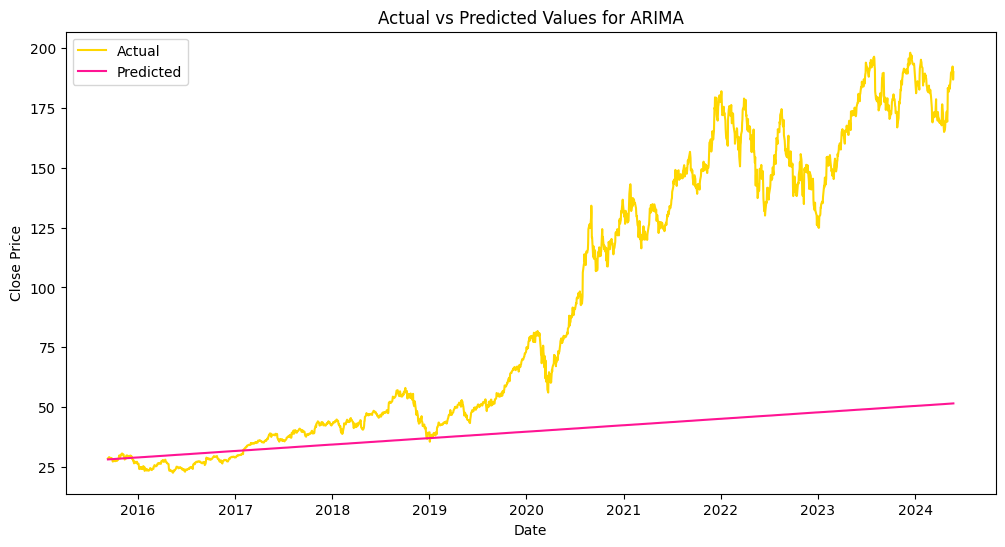

In [70]:
# plotting graph of actual vs predicted values for ARIMA
plt.figure(figsize=(12,6))
plt.plot(test["Date"], test["Close"], color="gold", label="Actual")
plt.plot(test["Date"], y_preds_arima, color="deeppink", label="Predicted")
plt.title("Actual vs Predicted Values for ARIMA")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()

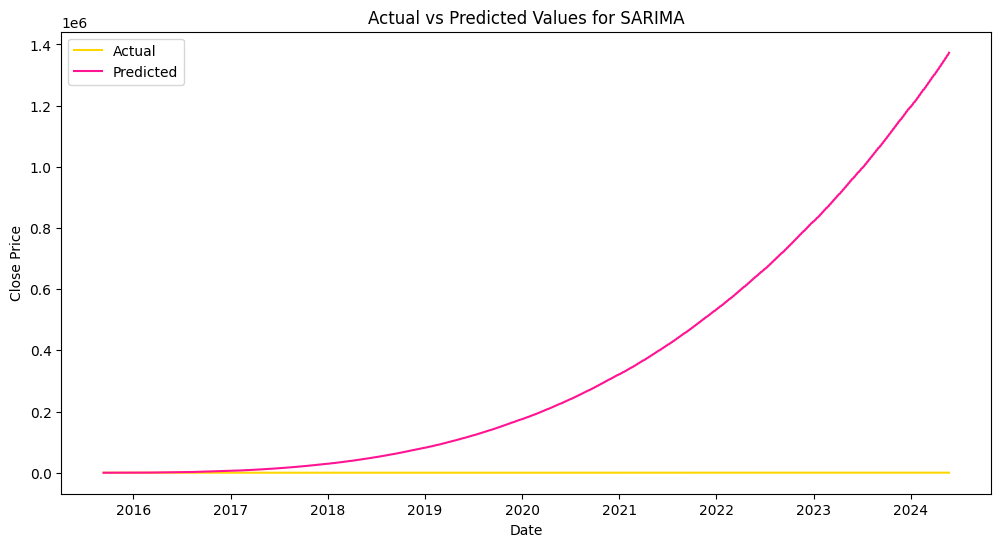

In [71]:
# plotting graph of actual vs predicted values for SARIMA
plt.figure(figsize=(12,6))
plt.plot(test["Date"], test["Close"], color="gold", label="Actual")
plt.plot(test["Date"], y_preds_sarima, color="deeppink", label="Predicted")
plt.title("Actual vs Predicted Values for SARIMA")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

### Deep Learning Models


In [72]:
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.callbacks import EarlyStopping

In [73]:
df = pd.read_csv("Apple Dataset.csv")
df["Date"] = pd.to_datetime(df["Date"])
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...,...
10949,2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
10950,2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
10951,2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500
10952,2024-05-23,190.979996,191.000000,186.630005,186.880005,186.880005,51005900


In [74]:
df.set_index("Date", inplace=True)
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1980-12-12,0.128348,0.128906,0.128348,0.128348,0.099058,469033600
1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093890,175884800
1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086999,105728000
1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089152,86441600
1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091737,73449600
...,...,...,...,...,...,...
2024-05-20,189.330002,191.919998,189.009995,191.039993,191.039993,44361300
2024-05-21,191.089996,192.729996,190.919998,192.350006,192.350006,42309400
2024-05-22,192.270004,192.820007,190.270004,190.899994,190.899994,34648500


In [75]:
features = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = df['Close']

In [76]:
# normalizing the data 
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1,1))

In [77]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i:i+seq_length])
    return np.array(sequences)

In [78]:
seq_length = 60

x = create_sequences(scaled_features, seq_length)
y = scaled_target[seq_length:]

In [79]:
# splitting the data into training and testing sets
split = int(0.8*len(x))

x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

#### Long Short Term Memory (LSTM) Model

In [80]:
lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(seq_length, x_train.shape[2])))
lstm_model.add(Dropout(0.2))
lstm_model.add(LSTM(units=50, return_sequences=False))
lstm_model.add(Dropout(0.2))
lstm_model.add(Dense(1))

print(lstm_model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 50)         │        11,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 31,451 (122.86 KB)

 Trainable params: 31,451 (122.86 KB)

 Non-trainable params: 0 (0.00 B)

None


In [81]:
lstm_model.compile(optimizer="adam", loss="mean_squared_error")
early_stopping = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=[x_test, y_test], callbacks=[early_stopping])

Epoch 1/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - loss: 1.7380e-04 - val_loss: 0.0061
Epoch 2/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.9245e-05 - val_loss: 0.0085
Epoch 3/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 2.4317e-05 - val_loss: 0.0058
Epoch 4/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.6193e-05 - val_loss: 0.0065
Epoch 5/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 1.9963e-05 - val_loss: 0.0037
Epoch 6/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.6289e-05 - val_loss: 0.0101
Epoch 7/10
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.7090e-05 - val_loss: 0.0060


In [82]:
lstm_preds = lstm_model.predict(x_test)
lstm_y_preds = scaler.inverse_transform(lstm_preds)

69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step


In [83]:
actual = scaler.inverse_transform(y_test.reshape(-1,1))

mse_lstm = np.mean(np.square(actual - lstm_y_preds))
r2_lstm = r2_score(actual, lstm_y_preds)
mape_lstm = mean_absolute_percentage_error(actual, lstm_y_preds)

print(f"Mean Squared Error: {mse_lstm}")
print(f"r2 Score: {r2_lstm}")
print(f"Mean Absolute Percentage Error: {mape_lstm}")

Mean Squared Error: 139.5612918166206
r2 Score: 0.9585074332722114
Mean Absolute Percentage Error: 0.05909659363989429


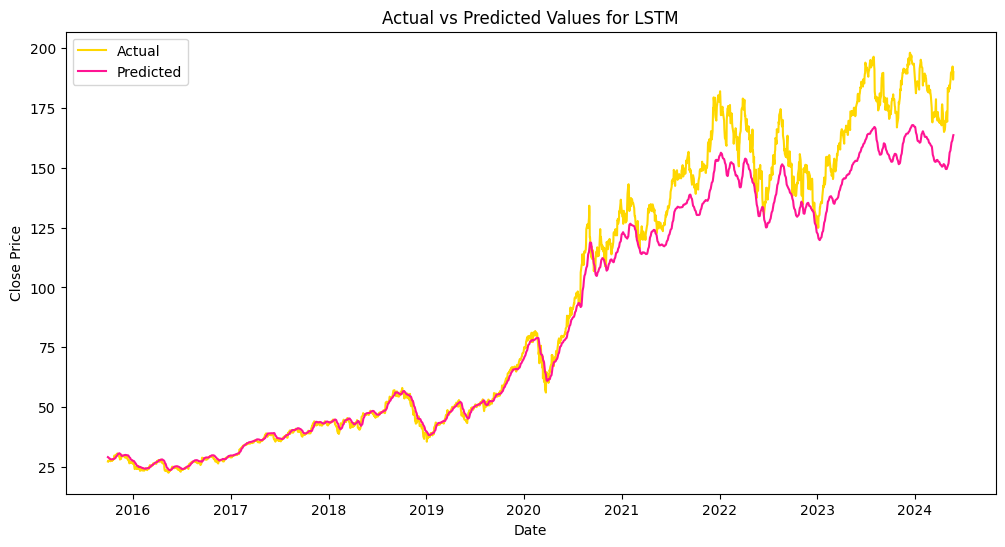

In [84]:
# plotting the predicted vs actual values for LSTM
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(lstm_y_preds):], actual, color="gold", label="Actual")
plt.plot(df.index[-len(lstm_y_preds):], lstm_y_preds, color="deeppink", label="Predicted")
plt.title("Actual vs Predicted Values for LSTM")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

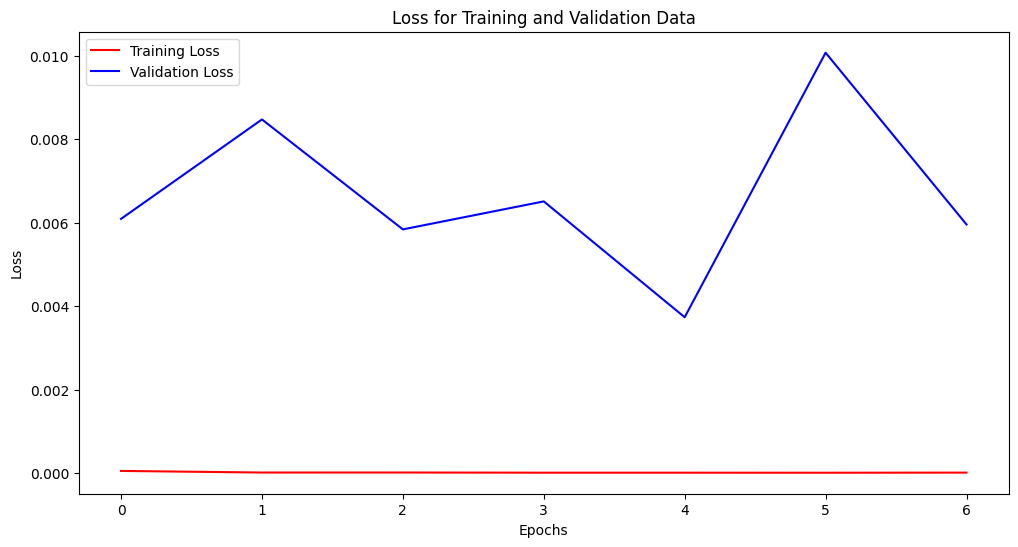

In [85]:
# plotting the loss for training and validation data
plt.figure(figsize=(12,6))
plt.plot(history.history["loss"], color="red", label="Training Loss")
plt.plot(history.history["val_loss"], color="blue", label="Validation Loss")
plt.title("Loss for Training and Validation Data")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [86]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, TensorDataset

In [87]:
features = df[['Open', 'High', 'Low', 'Adj Close', 'Volume']]
target = df['Close']

In [88]:
# Normalizing the data
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
scaled_target = scaler.fit_transform(target.values.reshape(-1, 1))

In [89]:
def create_sequences(data, seq_length):
    sequences = []
    for i in range(len(data) - seq_length):
        sequences.append(data[i: i + seq_length])
    return np.array(sequences)

In [90]:
seq_length = 60
X = create_sequences(scaled_features, seq_length)
y = scaled_target[seq_length:]

In [91]:
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

In [92]:
# converting to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

In [93]:
# creating a DataLoader
batch_size = 32
train_data = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_data, batch_size=batch_size, shuffle=True)


#### Gated Reccurrent Unit

In [94]:
class GRUModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim, dropout=0.2):
        super(GRUModel, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers

        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_dim, output_dim)
    
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])
        return out

In [95]:
# defining the parameters of the model
input_dim = X_train_tensor.shape[2]
hidden_dim = 64
num_layers = 2
output_dim = 1

In [96]:
# initializing the model
gru_model = GRUModel(input_dim, hidden_dim, num_layers, output_dim)

print(gru_model)

GRUModel(
  (gru): GRU(5, 64, num_layers=2, batch_first=True, dropout=0.2)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


In [97]:
# defining the loss function and the optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(gru_model.parameters(), lr=0.001)

In [98]:
num_epochs = 50

for epoch in range(num_epochs):
    gru_model.train()
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()

        y_pred = gru_model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 9.417787623533513e-06
Epoch 10, Loss: 7.050114163575927e-07
Epoch 20, Loss: 3.1435715754923876e-06
Epoch 30, Loss: 2.803436700560269e-06
Epoch 40, Loss: 3.1220670280163176e-06


In [99]:
# evaluating the model
gru_model.eval()
with torch.no_grad():
    y_test_pred = gru_model(X_test_tensor)
    y_test_pred = y_test_pred.cpu().numpy()
    y_test_actual = y_test_tensor.cpu().numpy()

    y_test_pred = scaler.inverse_transform(y_test_pred)
    y_test_actual = scaler.inverse_transform(y_test_actual)

    mse = np.mean(np.square(y_test_pred - y_test_actual))
    r2 = r2_score(y_test_actual, y_test_pred)
    mape = mean_absolute_percentage_error(y_test_actual, y_test_pred)

    print(f'Mean Squared Error: {mse}')
    print(f'R2 Score: {r2}')
    print(f'Mean Absolute Percentage Error: {mape}')

Mean Squared Error: 368.21282958984375
R2 Score: 0.8905277087407312
Mean Absolute Percentage Error: 0.09295184910297394


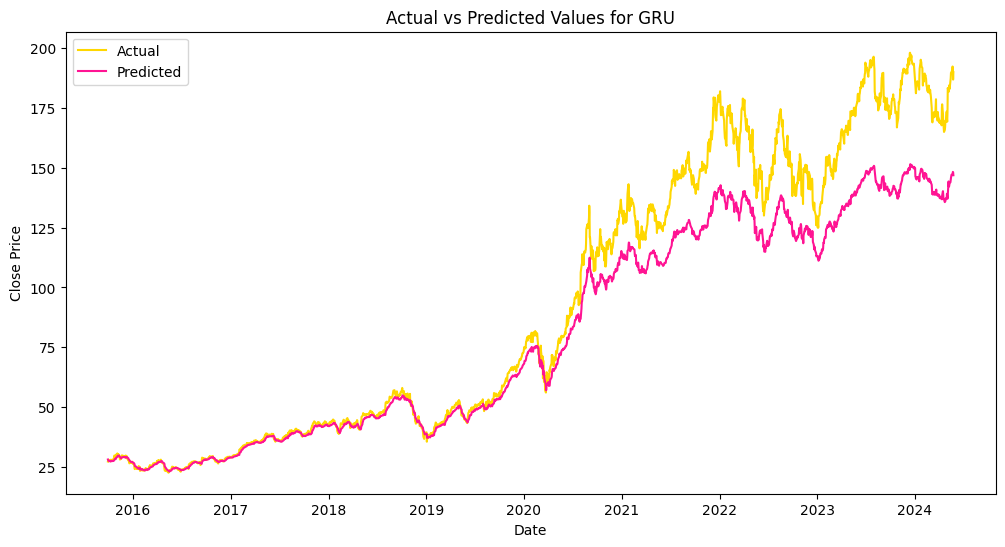

In [100]:
# plotting the predicted vs actual values for GRU
plt.figure(figsize=(12,6))
plt.plot(df.index[-len(y_test_pred):], y_test_actual, color="gold", label="Actual")
plt.plot(df.index[-len(y_test_pred):], y_test_pred, color="deeppink", label="Predicted")
plt.title("Actual vs Predicted Values for GRU")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

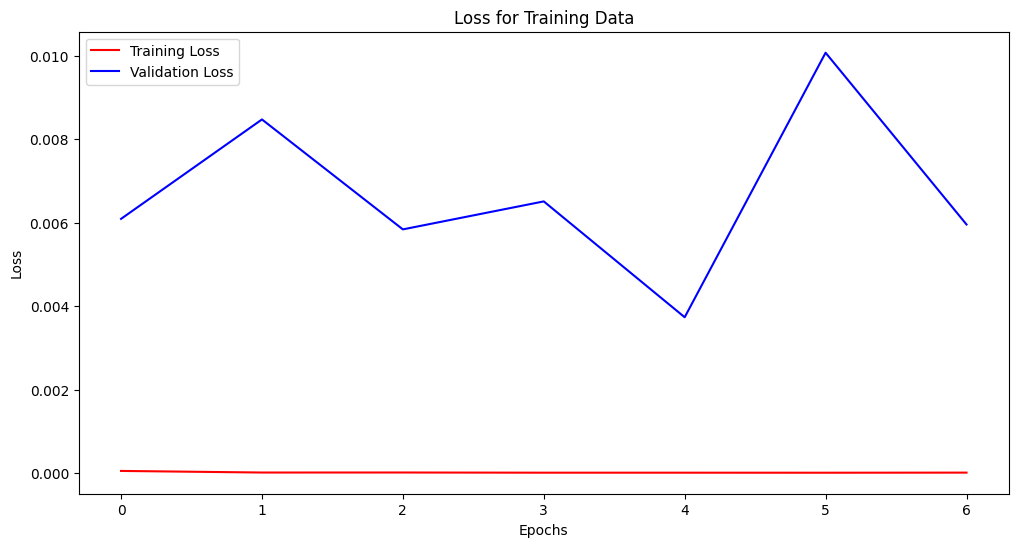

In [101]:
# plotting the loss for training data
plt.figure(figsize=(12,6))
plt.plot(history.history["loss"], color="red", label="Training Loss")
plt.plot(history.history["val_loss"], color="blue", label="Validation Loss")
plt.title("Loss for Training Data")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

### Saving Models

In [103]:
# saving all the small sized models in the folder called Models
folder = "Models"

if not os.path.exists(folder):
    os.mkdir(folder)

joblib.dump(lr, f"{folder}/Linear_Regression_Model.pkl")
joblib.dump(dtc, f"{folder}/Decision_Tree_Model.pkl")
# joblib.dump(rf, f"{folder}/Random_Forest_Model.pkl")
joblib.dump(svr, f"{folder}/Support_Vector_Regressor_Model.pkl")
joblib.dump(knr, f"{folder}/K_Nearest_Neighbors_Model.pkl")
joblib.dump(xgb, f"{folder}/XGBoost_Model.pkl")
joblib.dump(gbr, f"{folder}/Gradient_Boosting_Model.pkl")

# arima_model.save(f"{folder}/ARIMA_Model.pkl")

lstm_model.save(f"{folder}/LSTM_Model.keras")
torch.save(gru_model.state_dict(), f"{folder}/gru_model.pth")